# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

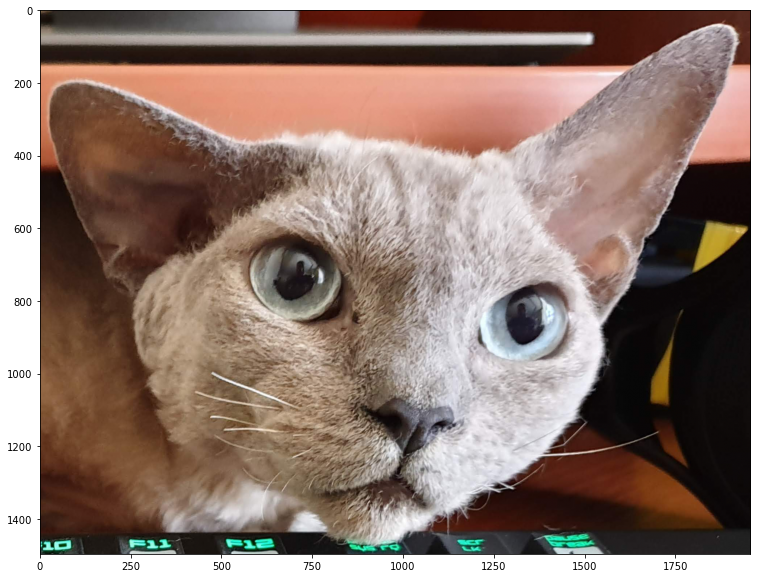

In [78]:
img = cv2.imread('imgs/cat.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
original = img/255
# print(original[:5,:5,...])
plt.imshow(original)

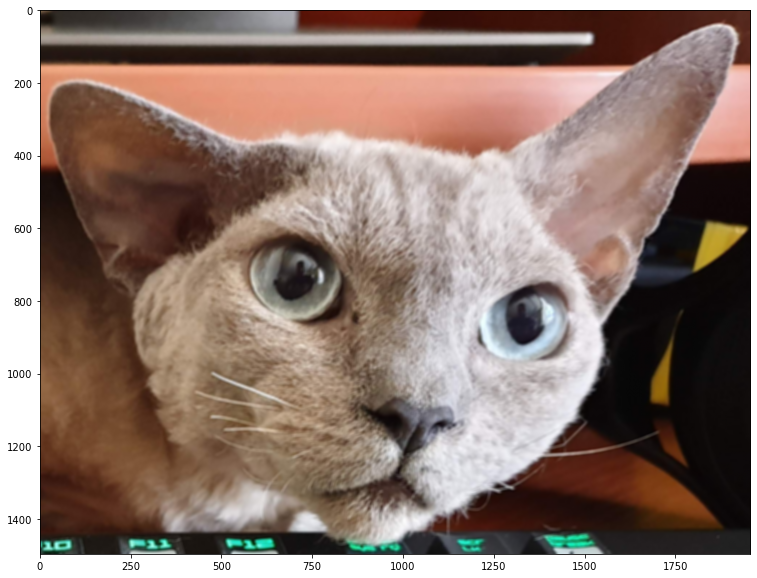

In [79]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(original, ksize=(9,9), sigmaX=35)
plt.imshow(unsharp)

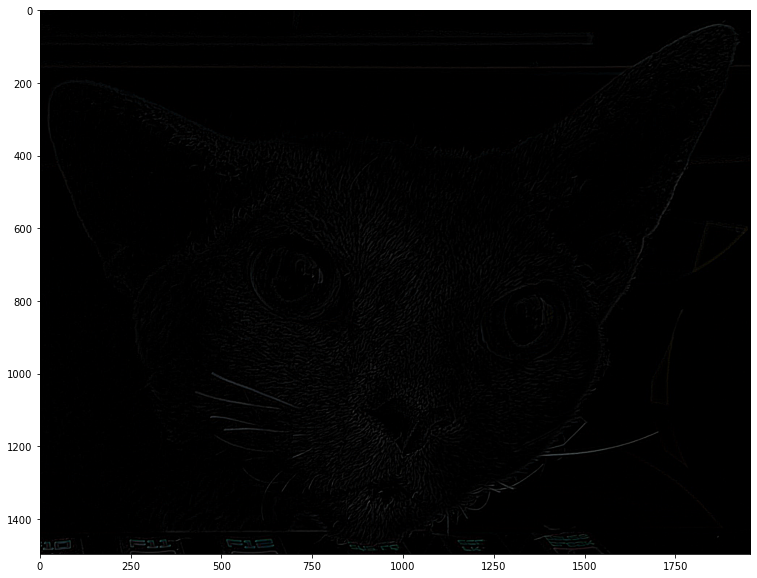

In [80]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
# diff = np.zeros_like(img, dtype=np.float32)
diff = np.clip(original - unsharp, 0, 1)
plt.imshow(diff)

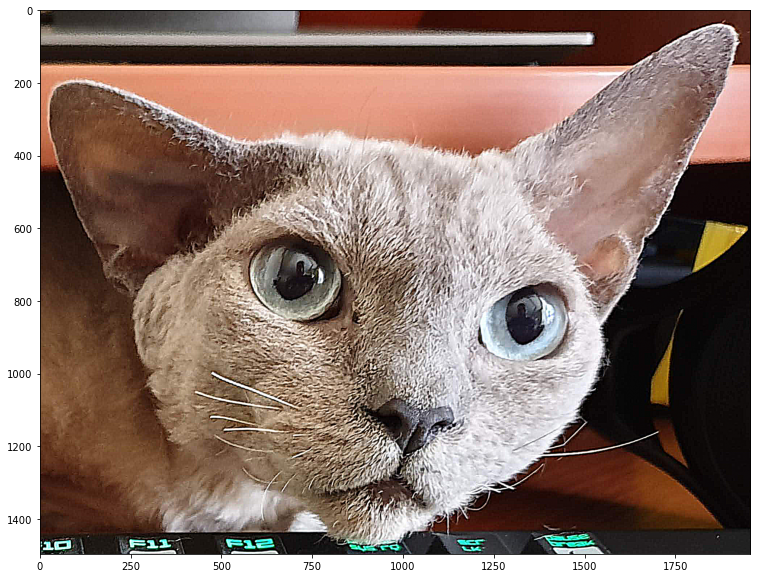

In [88]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
# sharpened = np.zeros_like(original, dtype=np.float32)
amount = 3
sharpened = np.clip(original + (original - unsharp) * amount, 0, 1)
# print(sharpened[:5,:5,...])
plt.imshow(sharpened)

### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * What happens if it is too small?
 * What happens if it is too large?

### Answer
`Amount` defines how much we want to emphasize differences between original and blurred image and thus augment details on the final image. Too small value will give us the very little, unnoticeable difference. If the value is too large, it will distort the final image. In my case (with my image), a value of 2 or 3 gives the best results.